# Module 4 Report: Linear Regression - Personality Test
## Analyzing the Comfortability Behavior in College Students

<br>

By: Billie Kim

Data Source: *Personality Surveys from ANLT 212 (Analytics Computing) collected by Dr. Dana* 

## Contents
1. [Objective](#1.-Objective)
2. [Data Exploration](#2.-Data-Exploration)
3. [Simple Linear Regression](#3.-Simple-Linear-Regression)
4. [Model Comparison](#4.-Model-Comparison)
5. [Multiple Linear Regression](#5.-Multiple-Linear-Regression)
6. [Summary](#6.-Summary)
7. [Recommendations](#7.-Recommendations)
8. [References](#8.-References)

## 1. Objective

We are tasked by the pschology department of the San Francisco County Office of Education to provide insights into the behaviors of college students. Specifically, we will explore relationships between certain behaviors using linear regression that can help the department provide better service to college counselors.

We will use survey results from the masters students in the University of the Pacific's class of ANLT 212 (Analytics Computing) as a sample of the larger student body. Each student was asked 51 questions on a scale from 1 (strongly disagree) to 10 (strongly agree). We will use the responses as data points and the questions as features in our models.

In this report, we will examine the relationships between key features that can help the department provide a better way to support both counselors as well as students using data-driven insights.



## 2. Data Exploration

In [2]:
# import packages
# install.packages("readxl")
library(readxl)

# install.packages("tidyverse")
library(tidyverse)

# install.packages("reshape2")
library(reshape2)

# install.packages("corrplot")
library(corrplot)

In [3]:
# read in exel files
df1 <- read_xlsx("/content/Class_2023_09_09__17_31_QZ_Personality Test-1.xlsx")
df2 <- read_xlsx("/content/Class_2023_09_09__17_47_QZ_Personality Test-1.xlsx")
df3 <- read_xlsx("/content/Class_2023_09_09__18_03_QZ_Personality Test-1.xlsx")

In [4]:
# print top 2 lines in each dataframe
head(df1,n=2)
head(df2,n=2)
head(df3,n=2)

"You enjoy vibrant social events with lots of peopleYour response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often spend time exploring unrealistic yet intriguing ideas.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your travel plans are more likely to look like a rough list of ideas than a detailed itinerary.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often think about what you should have said in a conversation long after it has taken place.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If your friend is sad about something, your first instinct is to support them emotionally, not try to solve their problem.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","People can rarely upset you.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often rely on other people to be the ones to start a conversation and keep it going.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If you have to temporarily put your plans on hold, you make sure it is your top priority to get back on track as soon as possible.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely worry if you made a good impression on someone you met.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","It would be a challenge for you to spend the whole weekend all by yourself without feeling bored.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test",⋯,"You feel comfortable just walking up to someone you find interesting and striking up a conversation.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Even when you have planned a particular daily routine, you usually just end up doing what you feel like at any given moment.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your mood can change very quickly.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often contemplate the reasons for human existence or the meaning of life.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often talk about your own feelings and emotions. Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely dwell on your regrets.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities

"You enjoy vibrant social events with lots of peopleYour response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often spend time exploring unrealistic yet intriguing ideas.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your travel plans are more likely to look like a rough list of ideas than a detailed itinerary.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often think about what you should have said in a conversation long after it has taken place.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If your friend is sad about something, your first instinct is to support them emotionally, not try to solve their problem.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","People can rarely upset you.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often rely on other people to be the ones to start a conversation and keep it going.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If you have to temporarily put your plans on hold, you make sure it is your top priority to get back on track as soon as possible.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely worry if you made a good impression on someone you met.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","It would be a challenge for you to spend the whole weekend all by yourself without feeling bored.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test",⋯,"You feel comfortable just walking up to someone you find interesting and striking up a conversation.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Even when you have planned a particular daily routine, you usually just end up doing what you feel like at any given moment.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your mood can change very quickly.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often contemplate the reasons for human existence or the meaning of life.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often talk about your own feelings and emotions. Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely dwell on your regrets.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities

"You enjoy vibrant social events with lots of peopleYour response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often spend time exploring unrealistic yet intriguing ideas.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your travel plans are more likely to look like a rough list of ideas than a detailed itinerary.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often think about what you should have said in a conversation long after it has taken place.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If your friend is sad about something, your first instinct is to support them emotionally, not try to solve their problem.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","People can rarely upset you.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often rely on other people to be the ones to start a conversation and keep it going.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","If you have to temporarily put your plans on hold, you make sure it is your top priority to get back on track as soon as possible.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely worry if you made a good impression on someone you met.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","It would be a challenge for you to spend the whole weekend all by yourself without feeling bored.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test",⋯,"You feel comfortable just walking up to someone you find interesting and striking up a conversation.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Even when you have planned a particular daily routine, you usually just end up doing what you feel like at any given moment.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","Your mood can change very quickly.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often contemplate the reasons for human existence or the meaning of life.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You often talk about your own feelings and emotions. Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities.com/free-personality-test","You rarely dwell on your regrets.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8 Based on https://www.16personalities

**Comment:** Each column name in the datasets is a question in the personality survey. However, this will be hard to work with trying to access each column. We will rename the columns with key words in each question.

In [5]:
# assign codenames
codenames <- c('socialevents', 'exploreideas', 'travelplans', 'thinklong', 'supportemo', 'rareupset', 'relyconverse', 'priorityplans', 'impression', 'weekendbored', 'detailpicture', 'affectionate', 'methodical', 'bothered', 'parties', 'relate', 'movies', 'pressure', 'jumping', 'dreams', 'ahead', 'sidetracked', 'doubt', 'introduce', 'philosophical', 'cry', 'drawn', 'views', 'choices', 'senses', 'revenge', 'whim', 'spendtime', 'message', 'want', 'wonder', 'public', 'present', 'understanding', 'project', 'highly', 'comfortable', 'routine', 'mood', 'contemplate', 'talk', 'regret', 'real', 'empathize', 'control', 'insecure')

# rename columns in each dataframe
colnames(df1) <- codenames
colnames(df2) <- codenames
colnames(df3) <- codenames

In [6]:
# create new column in each dataframe for group numbers
df1['group'] <- 1
df2['group'] <- 2
df3['group'] <- 3

**Comment:** Here, we create a new field group number for each dataframe. There could be insights at the group level.

In [7]:
# print dimension of each dataframe
dim(df1)
dim(df2)
dim(df3)

[1] 34 52

[1] 45 52

[1] 35 52

**Comment:** Before merging, we check the dimensions in each dataframe. There are 52 features in total in each dataframe. We should have a total of 114 rows in the final merged dataframe.

In [8]:
# merge 3 dataframes into 1
master_df <- df1 %>%
  bind_rows(df2) %>%
  bind_rows(df3)

# print number of rows and columns of merged dataframe
cat("Number of Rows:", nrow(master_df), "\n")
cat("Number of Columns:", ncol(master_df), "\n")

Number of Rows: 114 
Number of Columns: 52 


**Comment:** Awesome! The merge was successfully completed. We have a total of 114 records and 52 columns.

In [9]:
# print top 10 rows
head(master_df,n=10)

socialevents,exploreideas,travelplans,thinklong,supportemo,rareupset,relyconverse,priorityplans,impression,weekendbored,⋯,routine,mood,contemplate,talk,regret,real,empathize,control,insecure,group
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5,9,10,6.5,8.5,5,0,10,8,5.5,⋯,8,10,6,8.5,10,8,10,10,8.5,1
4,5.5,5,8,1,8,6,8,8,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
5,1,7,5,7.5,10,9,2,10,9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
8,5,6,6,10,4,4,7,8,5,⋯,4.2,6.4,9.2,7.9,7.5,5.5,8.9,6.7,6.5,1
8,9,8,8,8,8,8,8,8,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
9,7,6,7,8,8.5,3,7.5,4.5,8.5,⋯,7.5,8.5,6.5,7.5,6.5,7.5,7.5,3.5,7.5,1
6,7,6,6,8,5,6,8,8,7,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
8.7,9.6,10,3.7,10,7.6,3.5,2.5,1.3,2.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
6,3,6,5,3,3.5,5,6,3.5,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


**Comment:** The classes of our columns should be numerics but are currently character datatypes. We will need to convert them. Let's also print out the column names since we can't see all of them in the head statement.

In [10]:
# print column names
names(master_df)

[1] "socialevents"  "exploreideas"  "travelplans"   "thinklong"    
 [5] "supportemo"    "rareupset"     "relyconverse"  "priorityplans"
 [9] "impression"    "weekendbored"  "detailpicture" "affectionate" 
[13] "methodical"    "bothered"      "parties"       "relate"       
[17] "movies"        "pressure"      "jumping"       "dreams"       
[21] "ahead"         "sidetracked"   "doubt"         "introduce"    
[25] "philosophical" "cry"           "drawn"         "views"        
[29] "choices"       "senses"        "revenge"       "whim"         
[33] "spendtime"     "message"       "want"          "wonder"       
[37] "public"        "present"       "understanding" "project"      
[41] "highly"        "comfortable"   "routine"       "mood"         
[45] "contemplate"   "talk"          "regret"        "real"         
[49] "empathize"     "control"       "insecure"      "group"

In [11]:
# convert classes to numeric
master_df <- as.data.frame(lapply(master_df,as.numeric))

head(master_df,n=5)

,socialevents,exploreideas,travelplans,thinklong,supportemo,rareupset,relyconverse,priorityplans,impression,weekendbored,⋯,routine,mood,contemplate,talk,regret,real,empathize,control,insecure,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,9.0,10,6.5,8.5,5,0,10,8,5.5,⋯,8.0,10.0,6.0,8.5,10.0,8.0,10.0,10.0,8.5,1
2,4,5.5,5,8.0,1.0,8,6,8,8,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
3,5,1.0,7,5.0,7.5,10,9,2,10,9.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
4,8,5.0,6,6.0,10.0,4,4,7,8,5.0,⋯,4.2,6.4,9.2,7.9,7.5,5.5,8.9,6.7,6.5,1
5,8,9.0,8,8.0,8.0,8,8,8,8,8.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


**Comment:** Great! The columns have the correct datatypes and we can go forward with looking at correlations next.

In [12]:
# correlations of features
corr <- cor(master_df,use="complete.obs")
head(corr,n=20)

,socialevents,exploreideas,travelplans,thinklong,supportemo,rareupset,relyconverse,priorityplans,impression,weekendbored,⋯,routine,mood,contemplate,talk,regret,real,empathize,control,insecure,group
socialevents,1.00000000,0.19611424,0.224704676,0.331862495,0.30332076,-0.218176829,-0.26505377,-0.03015154,-0.054844234,0.41794917,⋯,0.16079381,-0.19265255,0.30287979,0.28236603,-0.2744338355,-0.143911149,0.31056579,-0.0936085581,0.008942681,-0.304725776
exploreideas,0.19611424,1.00000000,0.666883702,0.367650058,0.02356090,0.080926482,0.04984165,-0.05540982,0.122516998,0.11353475,⋯,0.31491118,0.10879722,0.32190492,0.22069431,-0.0002613913,-0.007909252,0.04498502,0.1207930628,0.142977577,-0.401520752
travelplans,0.22470468,0.66688370,1.000000000,0.490436112,0.20267386,0.120680398,0.14572169,0.04976594,0.151291507,0.12479726,⋯,0.01606944,0.11530180,0.26248618,0.12890520,-0.0729467218,0.175457758,0.20462131,0.2126354812,0.023217469,-0.288136650
thinklong,0.33186250,0.36765006,0.490436112,1.000000000,0.27957231,0.061474282,0.27953437,-0.05832322,0.038540641,0.13023251,⋯,0.11635501,0.12503680,0.05962308,0.26197097,-0.3792822747,0.008351903,0.33166924,0.0230512845,-0.291499888,-0.105122667
supportemo,0.30332076,0.02356090,0.202673856,0.279572306,1.00000000,-0.110929753,-0.39345512,-0.12445715,0.025838096,0.03054741,⋯,-0.16959329,0.06527133,0.40440902,0.35766279,0.0351067822,-0.224098909,0.38704535,0.1357482727,-0.212122822,-0.156412090
rareupset,-0.21817683,0.08092648,0.120680398,0.061474282,-0.11092975,1.000000000,0.13513507,0.03460255,0.494632629,0.02491863,⋯,-0.07049819,0.03393317,-0.19654854,-0.15768643,0.1062040486,0.089886912,-0.31761489,0.1024066600,0.193423123,0.075710175
relyconverse,-0.26505377,0.04984165,0.145721695,0.279534375,-0.39345512,0.135135074,1.00000000,-0.06130049,-0.091990226,-0.15536305,⋯,0.08425758,0.17867298,-0.35093625,-0.22024059,-0.0998333135,0.043658371,-0.26498917,-0.0955315404,-0.075263665,0.187577963
priorityplans,-0.03015154,-0.05540982,0.049765935,-0.058323221,-0.12445715,0.034602552,-0.06130049,1.00000000,0.125544305,0.28362684,⋯,0.08993213,0.27586381,-0.42871578,0.25077748,0.2479520186,0.261891520,0.13270099,-0.2554000198,0.493430098,-0.004442845
impression,-0.05484423,0.12251700,0.151291507,0.038540641,0.02583810,0.494632629,-0.09199023,0.12554430,1.000000000,0.23113609,⋯,-0.06243017,0.13230608,-0.01356177,0.20433021,0.4131782214,0.181655857,-0.13787873,0.3683641015,0.321387655,0.032131120
weekendbored,0.41794917,0.11353475,0.124797262,0.130232513,0.03054741,0.024918628,-0.15536305,0.28362684,0.231136089,1.00000000,⋯,-0.02968883,0.14741860,0.09788245,0.32394662,-0.0539485574,-0.098849248,0.10956373,-0.0008881103,0.316930856,-0.097635030


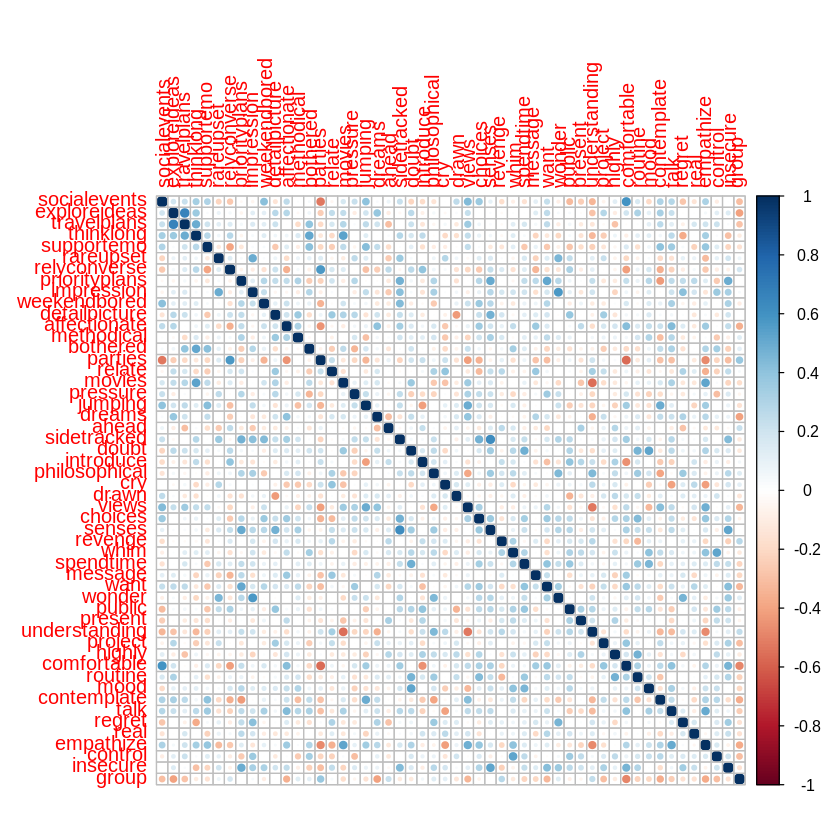

In [13]:
# create correlation heatmap
corrplot(corr)

**Comment:** Since there are a total of 52 features, visually seeing the correlations is way too hard. Next, we will try to filter only the highest correlations and recreate the correlation plot

In [14]:
# filter correlations >= 0.4 and remove correlations = 1
corr.df <- as.data.frame(as.table(corr)) %>%
  filter(Freq < 1, abs(Freq) >= 0.4) %>%
   arrange(desc(abs(Freq)))

# drop duplicates (every other row)
corr.df <- corr.df[seq(1,nrow(corr.df),by=2),]

# print top 10 correlations
head(corr.df,n=10)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,travelplans,exploreideas,0.6668837
3,senses,sidetracked,0.6280034
5,comfortable,socialevents,0.5903626
7,parties,relyconverse,0.5721301
9,wonder,impression,0.5719522
11,comfortable,parties,-0.5662820
13,understanding,movies,-0.5514244
15,movies,thinklong,0.5385724
17,control,whim,0.5268355


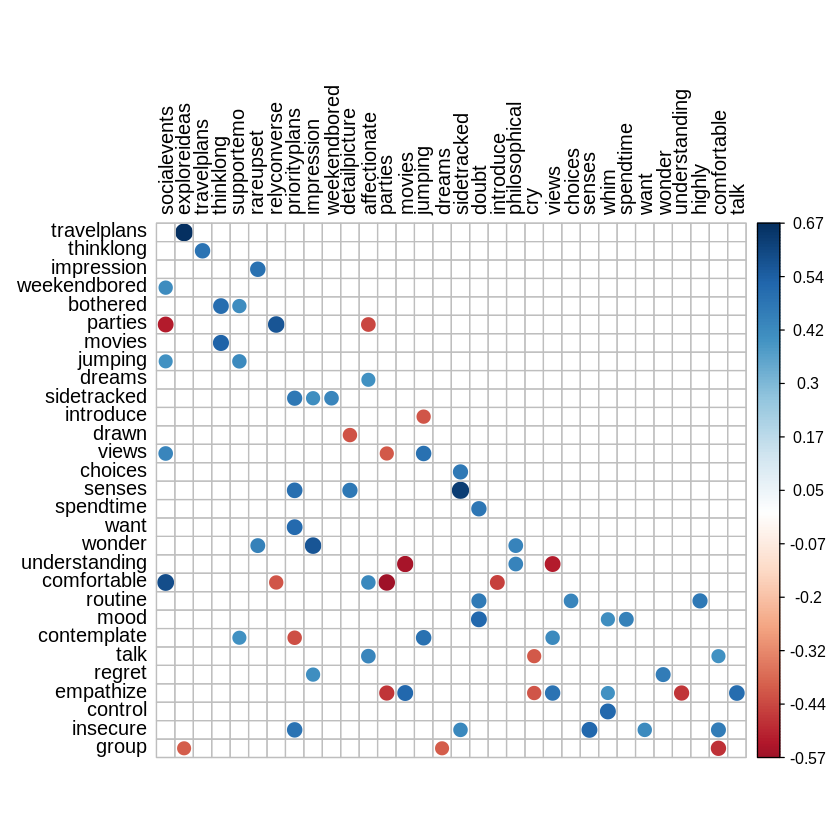

In [15]:
# create new correlation heatmap
corr2 <- reshape2::acast(corr.df,Var1~Var2,value.var="Freq")
corrplot(corr2,is.corr=FALSE,tl.col="black",na.label=" ")

**Comment:** I was able to adapt parts of the code from an article I found on [TowardsDataScience](https://towardsdatascience.com/how-to-create-a-correlation-matrix-with-too-many-variables-309cc0c0a57) by Catherine WIlliams to recreate the correlation heatmap of correlations greater than or equal to 0.4. It is visually in a way better digestible format.

In [16]:
# print highest correlated variables to 'comfortable'
corr.df[corr.df$Var1 == 'comfortable',]

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
5,comfortable,socialevents,0.5903626
11,comfortable,parties,-0.5662820
71,comfortable,introduce,-0.4547137
95,comfortable,affectionate,0.4281000
105,comfortable,relyconverse,-0.4199817


**Comment:** It looks like the top 5 highest correlated features of our response variable 'comfortable' are 'socialevents', 'parties', 'introduce', 'affectionate', and 'relyconverse'. We see that 'socialevents' and 'affectionate' are positively correlated to 'comfortable'. While 'parties', 'introduce',' and 'relyconverse' are negatively correlated to 'comfortable'. Next, we will move onto creating simple linear regression models using the highest correlated features.

## 3. Simple Linear Regression

**Target Variable:** comfortable

**Predictors:** socialevents, parties, introduce, affectionate, relyconverse


*   comfortable - You feel comfortable just walking up to someone you find interesting and striking up a conversation.
*   socialevents - You enjoy vibrant social events with lots of people.
*   parties - At parties and similar events you can mostly be found farther away from the action.
*   introduce - When at a social event, you rarely try to introduce yourself to new people and mostly talk to the ones you already know.
*   affectionate - You are very affectionate with people you care about.
*   relyconverse - You often rely on other people to be the ones to start a conversation and keep it going.

### Simple Linear Regression Model 1

In [17]:
# fit the simple linear regression model
LR1 <- lm(comfortable~socialevents, data = master_df)

# print model summary
summary(LR1)

# store r2 and rse
r21 <- round(summary(LR1)$adj.r.squared,4)
rse1 <- round(summary(LR1)$sigma,3)


Call:
lm(formula = comfortable ~ socialevents, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6862 -1.6745  0.3842  1.8842  5.4791 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.4678     1.0531   2.343 0.023585 *  
socialevents   0.5531     0.1486   3.721 0.000549 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.285 on 45 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.2353,	Adjusted R-squared:  0.2183 
F-statistic: 13.85 on 1 and 45 DF,  p-value: 0.0005487


**Comment:** This simple linear regression model fits a regression line between 'comfortable' and 'socialevents'. Around 21.83% of the variation in 'comfortable' can be explained by the variable 'socialevents'.

### Simple Linear Regression Model 2

In [18]:
# fit the simple linear regression model
LR2 <- lm(comfortable~parties, data = master_df)

# print model summary
summary(LR2)

# store r2 and rse
r22 <- round(summary(LR2)$adj.r.squared,4)
rse2 <- round(summary(LR2)$sigma,3)


Call:
lm(formula = comfortable ~ parties, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0176 -1.4040  0.2078  1.6314  4.7842 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.8940     0.6846  12.992  < 2e-16 ***
parties      -0.5255     0.1177  -4.466 5.32e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.175 on 45 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.3071,	Adjusted R-squared:  0.2917 
F-statistic: 19.94 on 1 and 45 DF,  p-value: 5.318e-05


**Comment:** This simple linear regression model fits a regression line between 'comfortable' and 'parties'. Around 29.17% of the variation in 'comfortable' can be explained by the variable 'parties'.

### Simple Linear Regression Model 3

In [19]:
# fit the simple linear regression model
LR3 <- lm(comfortable~introduce, data = master_df)

# print model summary
summary(LR3)

# store r2 and rse
r23 <- round(summary(LR3)$adj.r.squared,4)
rse3 <- round(summary(LR3)$sigma,3)


Call:
lm(formula = comfortable ~ introduce, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0438 -1.3799  0.5777  1.6647  3.7518 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.9871     0.9881   9.095  9.3e-12 ***
introduce    -0.4565     0.1507  -3.029  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.382 on 45 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.1694,	Adjusted R-squared:  0.1509 
F-statistic: 9.176 on 1 and 45 DF,  p-value: 0.004053


**Comment:** This simple linear regression model fits a regression line between 'comfortable' and 'introduce'. Around 21.83% of the variation in 'comfortable' can be explained by the variable 'introduce'.

### Simple Linear Regression Model 4

In [20]:
# fit the simple linear regression model
LR4 <- lm(comfortable~affectionate, data = master_df)

# print model summary
summary(LR4)

# store r2 and rse
r24 <- round(summary(LR4)$adj.r.squared,4)
rse4 <- round(summary(LR4)$sigma,3)


Call:
lm(formula = comfortable ~ affectionate, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9676 -2.0786  0.4769  1.5324  5.1434 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)    1.5236     1.5161   1.005  0.32029   
affectionate   0.5555     0.1759   3.157  0.00284 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.365 on 45 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.1814,	Adjusted R-squared:  0.1632 
F-statistic:  9.97 on 1 and 45 DF,  p-value: 0.00284


**Comment:** This simple linear regression model fits a regression line between 'comfortable' and 'affectionate'. Around 21.83% of the variation in 'comfortable' can be explained by the variable 'affectionate'.

### Simple Linear Regression Model 5

In [21]:
# fit the simple linear regression model
LR5 <- lm(comfortable~relyconverse, data = master_df)

# print model summary
summary(LR5)

# store r2 and rse
r25 <- round(summary(LR5)$adj.r.squared,4)
rse5 <- round(summary(LR5)$sigma,3)


Call:
lm(formula = comfortable ~ relyconverse, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5117 -1.4989  0.0433  1.6169  5.1507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.0326     0.7961  10.090 3.92e-13 ***
relyconverse  -0.3537     0.1364  -2.594   0.0128 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 45 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.1301,	Adjusted R-squared:  0.1107 
F-statistic: 6.728 on 1 and 45 DF,  p-value: 0.01277


**Comment:** This simple linear regression model fits a regression line between 'comfortable' and 'relyconverse'. Around 21.83% of the variation in 'comfortable' can be explained by the variable 'relyconverse'.

## 4. Model Comparison

In [22]:
# create a table of r2 and rse
model_eval1 <- matrix(c(r21,rse1,r22,rse2,r23,rse3,r24,rse4,r25,rse5),byrow=T,ncol=2)
colnames(model_eval1) <- c('R2','RSE')
rownames(model_eval1) <- c('LR1','LR2','LR3','LR4','LR5')

# print table
model_eval1

,R2,RSE
LR1,0.2183,2.285
LR2,0.2917,2.175
LR3,0.1509,2.382
LR4,0.1632,2.365
LR5,0.1107,2.438


**Comment:** The performance metrics that are being used to compare our models are adjusted r-squared for accuracy and residual standard error for our error term. We see that model 'LR2', using the second highest correlated feature 'parties' as the predictor, performs the best out of the other simple linear regression models. Even though LR1 used the highest correlated feature 'socialevents' as the predictor, the model scored lower accuracy and higher error than LR2.

## 5. Multiple Linear Regression

### Multiple Linear Regression Model 1

In [23]:
# fit the multiple regression model
MR1 <- lm(comfortable~parties + I(parties^2) + I(parties^3) + I(parties^4), data = master_df)

# print the model summary
summary(MR1)

# store r2 and rse
mr21 <- round(summary(MR1)$adj.r.squared,4)
mrse1 <- round(summary(MR1)$sigma,3)


Call:
lm(formula = comfortable ~ parties + I(parties^2) + I(parties^3) + 
    I(parties^4), data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0879 -1.5703  0.4871  1.5526  4.5526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.449220   1.877976   5.032 9.61e-06 ***
parties      -2.082696   2.418197  -0.861    0.394    
I(parties^2)  0.714564   0.942819   0.758    0.453    
I(parties^3) -0.104202   0.136791  -0.762    0.450    
I(parties^4)  0.004708   0.006562   0.718    0.477    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.214 on 42 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:   0.33,	Adjusted R-squared:  0.2662 
F-statistic: 5.172 on 4 and 42 DF,  p-value: 0.001765


**Comment:** In this multiple linear regression model, we use 'parties' and its polynomial terms up to the 4th degree to show the relationship between these variables and the response variable 'comfortable'. Approximately 26.62% of the variation in 'parties' can be explained by the relationship of these variables.

### Multiple Linear Regression Model 2

In [24]:
# fit the multiple regression model
MR2 <- lm(comfortable~parties + socialevents, data = master_df)

# print the model summary
summary(MR2)

# store r2 and rse
mr22 <- round(summary(MR2)$adj.r.squared,4)
mrse2 <- round(summary(MR2)$sigma,3)


Call:
lm(formula = comfortable ~ parties + socialevents, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1339 -1.0379  0.2204  1.2838  3.8983 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.7366     1.2977   4.421 6.35e-05 ***
parties       -0.4207     0.1159  -3.630 0.000736 ***
socialevents   0.3894     0.1394   2.794 0.007676 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.027 on 44 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.4115,	Adjusted R-squared:  0.3848 
F-statistic: 15.38 on 2 and 44 DF,  p-value: 8.595e-06


**Comment:** In this multiple linear regression model, we use 'parties' and 'socialevents' to show the relationship between these variables and the response variable' comfortable'. Approximately 38.48% of the variation in 'parties' can be explained by the relationship of these variables.

### Multiple Linear Regression Model 3

In [25]:
# fit the multiple regression model
MR3 <- lm(comfortable~parties + socialevents + I(parties^2) + parties:socialevents + I(socialevents^2), data = master_df)

# print the model summary
summary(MR3)

# store r2 and rse
mr23 <- round(summary(MR3)$adj.r.squared,4)
mrse3 <- round(summary(MR3)$sigma,3)


Call:
lm(formula = comfortable ~ parties + socialevents + I(parties^2) + 
    parties:socialevents + I(socialevents^2), data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7472 -1.0023  0.2003  1.2913  3.5952 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.64602    2.44183   4.360 8.54e-05 ***
parties              -0.41242    0.60179  -0.685  0.49700    
socialevents         -1.40829    0.64504  -2.183  0.03480 *  
I(parties^2)         -0.02871    0.04871  -0.589  0.55887    
I(socialevents^2)     0.12966    0.04612   2.811  0.00754 ** 
parties:socialevents  0.04872    0.04132   1.179  0.24511    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.916 on 41 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.5102,	Adjusted R-squared:  0.4505 
F-statistic: 8.543 on 5 and 41 DF,  p-value: 1.311e-05


**Comment:** In this multiple linear regression model, we use 'parties', 'socialevents', their squared terms, and their interaction term to show the relationship between these variables and the response variable 'comfortable'. Approximately 45.05% of the variation in 'parties' can be explained by the relationship of these variables.

### Multiple Linear Regression Model 4

In [26]:
# fit the multiple regression model
MR4 <- lm(comfortable~parties + socialevents + introduce + affectionate, data = master_df)

# print the model summary
summary(MR4)

# store r2 and rse
mr24 <- round(summary(MR4)$adj.r.squared,4)
mrse4 <- round(summary(MR4)$sigma,3)


Call:
lm(formula = comfortable ~ parties + socialevents + introduce + 
    affectionate, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0459 -1.1351  0.0867  1.3003  3.1007 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)    4.5135     1.8974   2.379  0.02199 * 
parties       -0.2612     0.1169  -2.234  0.03085 * 
socialevents   0.3290     0.1275   2.580  0.01348 * 
introduce     -0.3520     0.1221  -2.884  0.00617 **
affectionate   0.3537     0.1534   2.306  0.02613 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.837 on 42 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.5387,	Adjusted R-squared:  0.4948 
F-statistic: 12.26 on 4 and 42 DF,  p-value: 1.082e-06


**Comment:** In this multiple linear regression model, we use 'parties', 'socialevents', 'introduce', and 'affectionate' to show the relationship between these variables and the response variable 'comfortable'. Approximately 49.48% of the variation in 'parties' can be explained by the relationship of these variables.

### Multiple Linear Regression Model 5

In [27]:
# fit the multiple regression model
MR5 <- lm(comfortable~parties + socialevents + introduce + relyconverse, data = master_df)

# print the model summary
summary(MR5)

# store r2 and rse
mr25 <- round(summary(MR5)$adj.r.squared,4)
mrse5 <- round(summary(MR5)$sigma,3)


Call:
lm(formula = comfortable ~ parties + socialevents + introduce + 
    relyconverse, data = master_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1304 -1.2085 -0.0074  1.7447  3.2598 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.38832    1.54226   4.791  2.1e-05 ***
parties      -0.38043    0.11950  -3.184  0.00274 ** 
socialevents  0.36863    0.13933   2.646  0.01142 *  
introduce    -0.31090    0.13297  -2.338  0.02422 *  
relyconverse  0.03614    0.13142   0.275  0.78467    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.948 on 42 degrees of freedom
  (67 observations deleted due to missingness)
Multiple R-squared:  0.4812,	Adjusted R-squared:  0.4318 
F-statistic:  9.74 on 4 and 42 DF,  p-value: 1.148e-05


**Comment:** In this multiple linear regression model, we use 'parties', 'socialevents', 'introduce', 'affectionate', and 'relyconverse' to show the relationship between these variables and the response variable 'comfortable'. Approximately 43.18% of the variation in 'parties' can be explained by the relationship of these variables.

### Multiple Linear Regression Models Comparison

In [28]:
# create a table of r2 and rse
model_eval2 <- matrix(c(mr21,mrse1,mr22,mrse2,mr23,mrse3,mr24,mrse4,mr25,mrse5),byrow=T,ncol=2)
colnames(model_eval2) <- c('R2','RSE')
rownames(model_eval2) <- c('MR1','MR2','MR3','MR4','MR5')

# print table
model_eval2

,R2,RSE
MR1,0.2662,2.214
MR2,0.3848,2.027
MR3,0.4505,1.916
MR4,0.4948,1.837
MR5,0.4318,1.948


**Comment:** The model that performed best was MR4. Overall, the multiple regression models outperformed the simple linear regression models from the previous section. It seems that using multiple predictors captures the relationship of the response variable better by accounting for multivariate relationships.

## 6. Summary

This report provides an overview of certain college students behaviors using survey responses. The merged dataset contained a total of 114 rows and 52 columns. We created a correlation heatmap that revealed that some features have strong correlations. A threshold of 0.4 was used to filter and identify the highest correlations. Our response variable was 'comfortable' which focused on the comfortability of students. We found that features such as 'socialevents', 'parties', 'introduce', 'affectionate', and 'relyconverse' showed the highest correlations to response variable 'comfortable'. During the simple linear regression modeling phase, we found that the model that performed best was using the 2nd highest correlated feature 'parties' as the predictor. This model (LR2) achieved an r-squared of 29.17%. However, the most promising model created was the Multiple Linear Regression Model 4 (MR4) using the top 4 highest correlated features with an r-squared of 49.48%.

## 7. Recommendations

We recommend that the psychology department uses the findings in our report with caution. The survey data we used for analysis only had 114 responses. We strongly urge that the psychology department invests more time and resources for data collection in the future. Having a larger dataset will allow for a wider purview and greater bandwith to gain a more accurate perspective on understanding the behaviors of college students in today's climate.

This report studied the response variable that dealt with the comfortability of students. We recommend that the department also explores the relationships of other variables that were not covered in this report. The department should also rerun and update the Multiple Linear Regression Model 4 (MR4) with new data in the future.

## 8. References

1. 1. Williams, C. (2020, Feb 23). *How to Create a Correlation Matrix with Too Many Variables in R*. Towards Data Science. https://towardsdatascience.com/how-to-create-a-correlation-matrix-with-too-many-variables-309cc0c0a57
